# Milk Grade Classification with CNN

The milk grade classification project using CNN (Convolutional Neural Network) aims to classify milk samples into different grades based on their quality. The project involves using deep learning techniques to analyze milk data and make predictions about its grade.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset

In [2]:
dataframe = pd.read_csv('milknew.csv')

# Exploratory Data Analysis

The process of analyzing and understanding a dataset to gain insights and identify patterns or trends. The goal of exploring the data is to become familiar with its structure, distribution, and quality, as well as to identify potential issues or anomalies that may need to be addressed before further analysis.

In [3]:
dataframe.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
dataframe.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
dataframe.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
dataframe.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
dataframe.shape

(1059, 8)

In [9]:
dataframe['Grade'] = dataframe['Grade'].map({'low':0, 'medium':1, 'high':2})

In [10]:
dataframe.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [11]:
dataframe.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [12]:
corr_matrix = dataframe.corr()

In [13]:
corr_matrix

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot:>

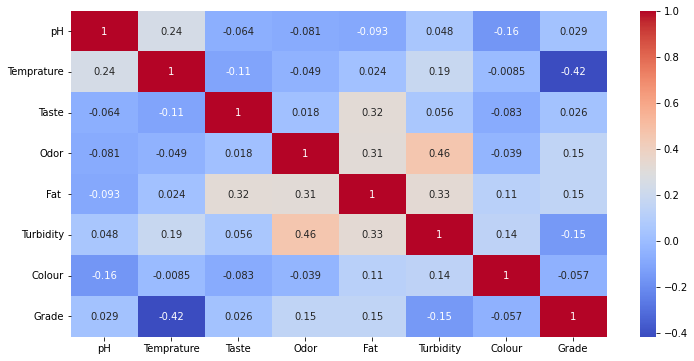

In [14]:
plt.figure(figsize = (12, 6))
sns.heatmap(
    corr_matrix, 
    annot = True, 
    cmap = 'coolwarm'
)

In [15]:
dataframe.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [16]:
dataset = dataframe.drop('Grade', axis = 1)

In [17]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


<AxesSubplot:title={'center':'Correlation wih Grade'}>

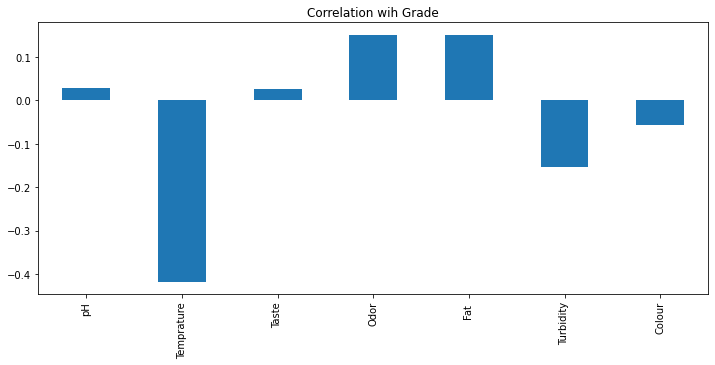

In [18]:
dataset.corrwith(dataframe['Grade']).plot.bar(
    figsize = (12, 5),
    title = 'Correlation wih Grade',
    rot = 90
)

In [19]:
dataframe.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [20]:
dataframe.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [21]:
x = dataframe.drop('Grade', axis = 1)
y = dataframe['Grade']

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((847, 7), (212, 7), (847,), (212,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

StandardScaler follows the concept of standardization, also known as Z-score normalization. It transforms the features such that they have a mean of 0 and a standard deviation of 1. This process centers the feature distribution around 0 and scales it to a standard deviation of 1.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_train

array([[ 0.1258701 , -0.41330182,  0.91504655, ...,  0.6803433 ,
        -0.99411413, -1.61267828],
       [-0.01505782,  0.09729713, -1.09284057, ..., -1.46984617,
         1.00592071, -0.43999756],
       [ 0.1258701 ,  0.09729713,  0.91504655, ...,  0.6803433 ,
        -0.99411413, -1.61267828],
       ...,
       [-0.08552179, -0.82178098, -1.09284057, ...,  0.6803433 ,
        -0.99411413,  0.73268316],
       [-0.01505782,  0.60789609, -1.09284057, ..., -1.46984617,
         1.00592071, -0.43999756],
       [ 0.1258701 ,  0.09729713,  0.91504655, ...,  0.6803433 ,
        -0.99411413, -1.61267828]])

In [29]:
x_test

array([[-0.01505782, -0.41330182,  0.91504655, ...,  0.6803433 ,
         1.00592071,  0.73268316],
       [-1.49480102,  1.62909399, -1.09284057, ...,  0.6803433 ,
         1.00592071, -0.43999756],
       [ 1.67607726, -0.10694245,  0.91504655, ...,  0.6803433 ,
         1.00592071, -0.43999756],
       ...,
       [ 0.1258701 , -0.31118203, -1.09284057, ..., -1.46984617,
        -0.99411413,  0.73268316],
       [-0.08552179, -0.82178098, -1.09284057, ...,  0.6803433 ,
        -0.99411413,  0.26361087],
       [-0.01505782,  0.09729713, -1.09284057, ...,  0.6803433 ,
         1.00592071, -0.43999756]])

# Reshaping 

Reshaping a tensor involves rearranging its elements into a new shape without changing their values. The reshaping operation can be applied to tensors of different dimensions, such as converting a 1D tensor into a 2D tensor or vice versa. Reshaping is commonly performed using the reshape() function or method available in most deep learning frameworks.

In [30]:
x_train.shape, x_test.shape

((847, 7), (212, 7))

In [31]:
x_train = x_train.reshape(847, 7, 1)
x_test = x_test.reshape(212, 7, 1)

In [32]:
x_train.shape, x_test.shape

((847, 7, 1), (212, 7, 1))

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
model = Sequential()
model.add(Conv1D(64, kernel_size = 2, activation = 'relu', input_shape = (7, 1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Conv1D(128, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 64)            256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 128)            16512     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                        

Early stopping is a technique used during the training of machine learning models to prevent overfitting and find the optimal point at which to stop training. It involves monitoring the performance of the model on a validation dataset and stopping the training process when the model's performance on the validation dataset starts to degrade.

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [37]:
model.compile(optimizer = Adam(0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [38]:
model.fit(x_train, y_train, 
          epochs = 100, 
          validation_data = (x_test, y_test), 
          callbacks = [early_stop])

Epoch 1/100
27/27 [==============================] - 9s 51ms/step - loss: 1.3636 - accuracy: 0.3802 - val_loss: 1.0594 - val_accuracy: 0.5283
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 0.8652 - accuracy: 0.6057 - val_loss: 1.0220 - val_accuracy: 0.6274
Epoch 3/100
27/27 [==============================] - 0s 14ms/step - loss: 0.6388 - accuracy: 0.7273 - val_loss: 0.9890 - val_accuracy: 0.6321
Epoch 4/100
27/27 [==============================] - 0s 14ms/step - loss: 0.5166 - accuracy: 0.8040 - val_loss: 0.9465 - val_accuracy: 0.6509
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 0.4556 - accuracy: 0.8182 - val_loss: 0.8937 - val_accuracy: 0.6934
Epoch 6/100
27/27 [==============================] - 0s 16ms/step - loss: 0.4045 - accuracy: 0.8501 - val_loss: 0.8394 - val_accuracy: 0.7594
Epoch 7/100
27/27 [==============================] - 1s 21ms/step - loss: 0.3484 - accuracy: 0.8642 - val_loss: 0.7751 - val_accuracy: 0.7736
Epoch 

In [39]:
model.save('model_milk_grade_classification.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [40]:
loss = pd.DataFrame(model.history.history)

In [41]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.363583,0.380165,1.059369,0.528302
1,0.865168,0.605667,1.022050,0.627358
2,0.638838,0.727273,0.989015,0.632075
3,0.516624,0.804014,0.946541,0.650943
4,0.455591,0.818182,0.893738,0.693396


<AxesSubplot:>

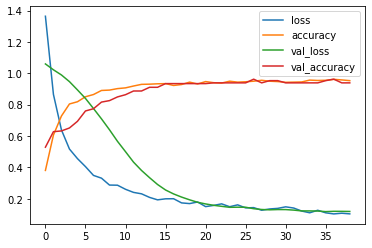

In [42]:
loss.plot()

<AxesSubplot:>

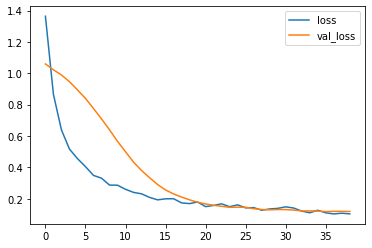

In [43]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

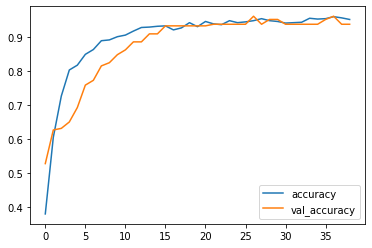

In [44]:
loss[['accuracy', 'val_accuracy']].plot()

# Prediction

In [45]:
y_pred = model.predict(x_test)
predict_class = y_pred.argmax(axis = 1)

7/7 [==============================] - 1s 9ms/step


In [46]:
print(y_test.iloc[20]), print(predict_class[20])

0
0


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is a useful tool for evaluating the accuracy and effectiveness of a classification model.

In [48]:
print(confusion_matrix(y_test, predict_class))

[[76  0  2]
 [ 0 80  6]
 [ 0  2 46]]


# Classification Report

A classification report is a summary of various evaluation metrics for a classification model. It provides a comprehensive overview of the model's performance, including metrics such as precision, recall, F1 score, and support.

In [49]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.98      0.93      0.95        86
           2       0.85      0.96      0.90        48

    accuracy                           0.95       212
   macro avg       0.94      0.95      0.95       212
weighted avg       0.96      0.95      0.95       212



# Accuracy Score

Accuracy score is a commonly used metric to evaluate the performance of a classification model. It measures the proportion of correct predictions made by the model out of the total number of predictions.

The accuracy score is calculated using the following formula:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

In [50]:
print(accuracy_score(y_test, predict_class))

0.9528301886792453
